In [55]:
from graphviz import Digraph 
import math
dot = Digraph()

In [154]:
#string = "She sells seashells by the seashore,The shells she sells are seashells, I'm sure.So if she sells seashells on the seashore,Then I'm sure she  sells seashore shells"
#string="Jakub Sokół Teleinformatyka"
string = "She sells seashells by the seashore, The shells she sells are are seashells, I'm sure. So if she sells seashells on the seashore, Then I'm sure she sells seashore shells."

Tekst do zakodowania:  Jakub Sokół Teleinformatyka
Ilosc znakow:  27

PRAWDOPODOBIENSTWA:
a 3/27 = 0.1111111111111111
k 3/27 = 0.1111111111111111
  2/27 = 0.07407407407407407
o 2/27 = 0.07407407407407407
e 2/27 = 0.07407407407407407
J 1/27 = 0.037037037037037035
u 1/27 = 0.037037037037037035
b 1/27 = 0.037037037037037035
S 1/27 = 0.037037037037037035
ó 1/27 = 0.037037037037037035
ł 1/27 = 0.037037037037037035
T 1/27 = 0.037037037037037035
l 1/27 = 0.037037037037037035
i 1/27 = 0.037037037037037035
n 1/27 = 0.037037037037037035
f 1/27 = 0.037037037037037035
r 1/27 = 0.037037037037037035
m 1/27 = 0.037037037037037035
t 1/27 = 0.037037037037037035
y 1/27 = 0.037037037037037035

Kody dla symboli:
m -> 0000
t -> 0001
a -> 001
k -> 010
y -> 0110
  -> 0111
o -> 1000
e -> 1001
J -> 10100
u -> 10101
b -> 10110
S -> 10111
ó -> 11000
ł -> 11001
T -> 11010
l -> 11011
i -> 11100
n -> 11101
f -> 11110
r -> 11111


ENTROPIA:  4.180451390892102
SREDNIA DLUGOSC SLOWA:  4.2222222222222205

Zakodowany te

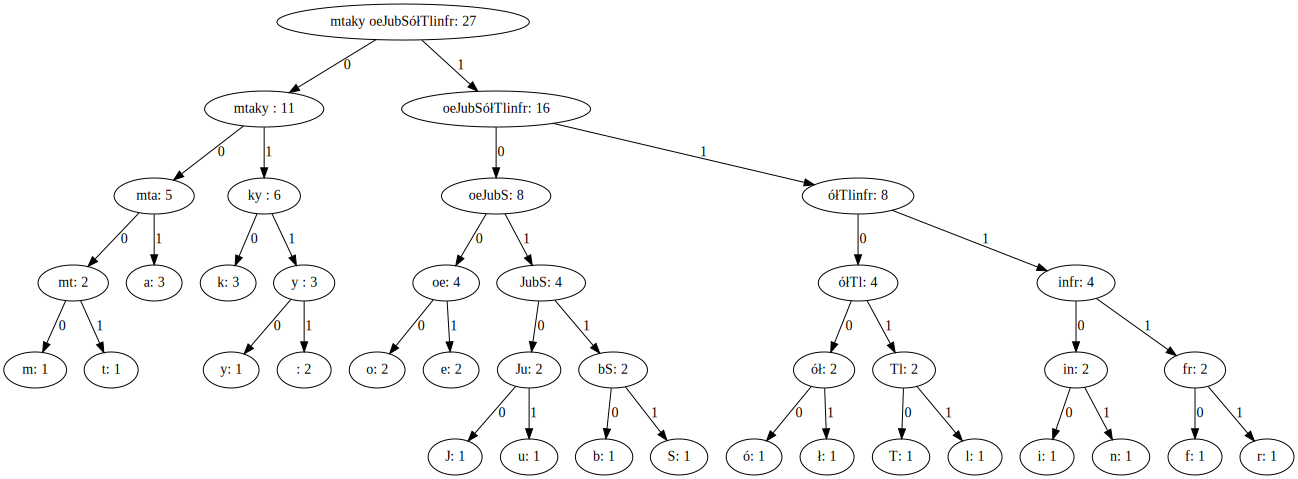

In [156]:
# A Huffman Tree Node
class node:
    def __init__(self, freq, symbol, left=None, right=None):
        # frequency of symbol
        self.freq = freq
 
        # symbol name (character)
        self.symbol = symbol
 
        # node left of current node
        self.left = left
 
        # node right of current node
        self.right = right
 
        # tree direction (0/1)
        self.huff = ''
values=[]
symbols=[]
def printNodes(node, val=''):
    # huffman code for current node
    newVal = val + str(node.huff)
 
    # if node is not an edge node
    # then traverse inside it
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)
 
        # if node is edge node then
        # display its huffman code
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")
        values.append(newVal)
        symbols.append(node.symbol)

def split(word):
    return [char for char in word]# frequency of charecters

chars = split(string)
#print("chars: ",chars)
print("Text to encode: ",string)

freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1
freq = sorted(freq.items(), key=lambda x: x[1], reverse=True) 

freq2=[]
chars2=[]
for a,b in freq:
    freq2.append(b)
    chars2.append(a)

print("Number of characters: ",len(chars))

entropy=0
print("\nProbabilities:")    
for a,b in freq:
    a=str(a)
    c=str(b/(len(chars)))  
    
    x=b/(len(chars))
    entropy=entropy+x*math.log2(1/x) 
    
    b=str(b)
    print(a+" "+b+"/"+str(len(chars))+" = "+c)
   
nodes = []
 
# converting charecters and frequencies
# into huffman tree nodes
for x in range(len(chars2)):
    nodes.append(node(freq2[x], chars2[x]))

while len(nodes) > 1:
    # sort all the nodes in ascending order
    # based on theri frequency
    nodes = sorted(nodes, key=lambda x: x.freq)
 
    # pick 2 smallest nodes
    left = nodes[0]
    right = nodes[1]
 
    # assign directional value to these nodes
    left.huff = 0
    right.huff = 1
 
    # combine the 2 smallest nodes to create
    # new node as their parent
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
 
    # remove the 2 nodes and add their
    # parent as new node among others
    nodes.remove(left)
    nodes.remove(right)
    nodes.append(newNode)

    
print("\nCodes for symbols:")
printNodes(nodes[0])
combined=dict(zip(symbols,values))

encoded=[]
for i in string:
    for j in combined.keys():
        if(i==j):
            encoded.append(combined.get(j))
        
summary=0            
for a,b in freq:
    a=str(a) #symbol
    c=b/(len(chars)) 
    for j in combined.keys():
        if(a==j):
            summary=summary+c*len(combined.get(j))
    
print("\n")   
print("ENTROPHY: ",entropy)
print("AVERAGE WORD LENGTH: ",summary)            

print("\nEncoded text:")
#print(encoded)
#print("\n")
print(''.join(encoded))
print("\n")

def visualize_tree(tree):
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.symbol)+": "+str(tree.freq))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.symbol)+": "+str(tree.left.freq))
            dot.edge(str(tree), str(tree.left),label="0")
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.symbol)+": "+str(tree.right.freq))
            dot.edge(str(tree), str(tree.right),label="1")
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot    
    
#huffmanCode
dot = visualize_tree(nodes[0])